In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
train=pd.read_csv('train2.csv')
test=pd.read_csv('test.csv')

In [ ]:
embarkedMode = train['Embarked'].mode()
embarkedMode

0    S
dtype: object

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Embarked']=train['Embarked'].fillna('S')
train.drop(['Cabin'], axis=1 ,inplace=True)
train.drop([ 'Ticket'], axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.drop(['Cabin'], axis=1 ,inplace=True)
test.drop([ 'Ticket'], axis=1, inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [ ]:
#categorical data to numerical: 

In [ ]:
train=pd.get_dummies(train,columns=['Embarked'],drop_first=True)
train['Sex'].replace({'male':0, 'female':1}, inplace = True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [ ]:
test=pd.get_dummies(test,columns=['Embarked'],drop_first=True)
test['Sex'].replace({'male':0, 'female':1}, inplace = True)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,1


New features

In [ ]:
#By name prefix/ titles

In [ ]:
def getPrefixFunc(df):
    train['Prefix']=[txt.split(',')[1].split('.')[0]for txt in train['Name']]
    train['Prefix'] = train['Prefix'].str.replace(' ', '')

In [ ]:
getPrefixFunc(train)

In [ ]:
newPrefix = {
    'Mr' : 'Mr','Ms' : 'Mrs','Mrs' : 'Mrs','Rev' : 'Unique','Sir' : 'Mr','theCountess' : 'Mrs','Dona' : 'Mrs','Capt' : 'Unique','Col' : 'Unique','Don' : 'Unique','Dr' : 'Unique','Jonkheer' : 'Unique','Lady' : 'Mrs','Major' : 'Unique','Master' : 'Master','Miss' : 'Mrs','Mlle' : 'Mrs','Mme' : 'Unique'
}
train['Prefix'] = train['Prefix'].apply(lambda x: newPrefix[x])

In [ ]:
train=pd.get_dummies(train,columns=['Prefix'],drop_first=True)

In [ ]:
def getPrefixFunc2(df):
    test['Prefix']=[txt.split(',')[1].split('.')[0]for txt in test['Name']]
    test['Prefix'] = test['Prefix'].str.replace(' ', '')

In [ ]:
getPrefixFunc2(test)

In [ ]:
newPrefix = {
    'Mr' : 'Mr','Ms' : 'Mrs','Mrs' : 'Mrs','Rev' : 'Unique','Sir' : 'Mr','theCountess' : 'Mrs','Dona' : 'Mrs','Capt' : 'Unique','Col' : 'Unique','Don' : 'Unique','Dr' : 'Unique','Jonkheer' : 'Unique','Lady' : 'Mrs','Major' : 'Unique','Master' : 'Master','Miss' : 'Mrs','Mlle' : 'Mrs','Mme' : 'Unique'
}
test['Prefix'] = test['Prefix'].apply(lambda x: newPrefix[x])

In [ ]:
test=pd.get_dummies(test,columns=['Prefix'],drop_first=True)

In [ ]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Prefix_Mr,Prefix_Mrs,Prefix_Unique
0,892,3,0,34.5,0,0,7.8292,1,0,1,0,0
1,893,3,1,47.0,1,0,7.0000,0,1,0,1,0
2,894,2,0,62.0,0,0,9.6875,1,0,1,0,0
3,895,3,0,27.0,0,0,8.6625,0,1,1,0,0
4,896,3,1,22.0,1,1,12.2875,0,1,0,1,0


In [ ]:
#By ages  

In [ ]:
train.loc[train['Age'] < 18, 'newAge'] = 'Child'
train.loc[(train['Age'] >= 18) & (train['Age'] < 28), 'newAge'] = '18-30'
train.loc[(train['Age'] >= 28) & (train['Age'] < 44), 'newAge'] = '30-45'
train.loc[train['Age'] >= 45, 'newAge'] = '45+'

In [ ]:
train=pd.get_dummies(train,columns=['newAge'],drop_first=True)

In [ ]:
test.loc[train['Age'] < 18, 'newAge'] = 'Child'
test.loc[(train['Age'] >= 18) & (train['Age'] < 30), 'newAge'] = '18-30'
test.loc[(train['Age'] >= 30) & (train['Age'] < 45), 'newAge'] = '30-45'
test.loc[train['Age'] >= 45, 'newAge'] = '45+'

In [ ]:
test=pd.get_dummies(test,columns=['newAge'],drop_first=True)
test.drop(['Age'], axis=1 ,inplace=True)
train.drop(['Age'], axis=1 ,inplace=True)

In [ ]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Prefix_Mr,Prefix_Mrs,Prefix_Unique,newAge_30-45,newAge_45+,newAge_Child
0,892,3,0,0,0,7.8292,1,0,1,0,0,0,0,0
1,893,3,1,1,0,7.0000,0,1,0,1,0,1,0,0
2,894,2,0,0,0,9.6875,1,0,1,0,0,0,0,0
3,895,3,0,0,0,8.6625,0,1,1,0,0,1,0,0
4,896,3,1,1,1,12.2875,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X= train.drop('Survived', axis=1)
y= train['Survived']
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=.3)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel=LogisticRegression(max_iter=1000)
LRmodel.fit(X_train, y_train)
LR_pred=LRmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('logistic regression accuraccy:',accuracy_score(y_test,LR_pred))

logistic regression accuraccy: 0.8171641791044776


In [ ]:
#LR_pred_test = LRmodel.predict(test)
#test['Survived'] = pd.Series(LR_pred_test)

In [ ]:
#submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': LR_pred_test})

In [ ]:
#submit.to_csv('LR_pred_test2.csv', index=False)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train.drop('Survived', axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(train.drop('Survived',axis=1)) 
train_feat = pd.DataFrame(scaled_features,columns=train.columns[:-1]) 

In [ ]:
error_rates = []
for k in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test)) 

Text(0, 0.5, 'error rate')

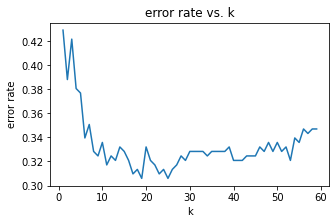

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(range(1,60), error_rates)
plt.title('error rate vs. k')
plt.xlabel('k')
plt.ylabel('error rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
KNN_pred= knn.predict(X_test)
print('knn accuracy:', accuracy_score(y_test,KNN_pred))

knn accuracy: 0.6716417910447762


SVM

In [ ]:
from sklearn.svm import SVC
SVCmodel = SVC()
SVCmodel.fit(X_train,y_train)
SVC_pred = SVCmodel.predict(X_test)

In [ ]:
print('SVM accuracy:', accuracy_score(y_test,SVC_pred))

SVM accuracy: 0.6492537313432836


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.613 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.621 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [ ]:
GSP = grid.predict(X_test)

In [ ]:
print(accuracy_score(y_test, GSP))

0.7574626865671642


In [ ]:
SVC2model = SVC( C=100, kernel='rbf', gamma=.0001)
SVC2model.fit(X_train,y_train)
SVC2_pred = SVC2model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, SVC2_pred))

Accuracy: 0.6977611940298507


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
decisionTree_pred = dtc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, decisionTree_pred))

Accuracy: 0.7686567164179104


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=20, random_state=5)
rfc.fit(X_train,y_train)
randomForest_pred = rfc.predict(X_test)
print(accuracy_score(y_test, randomForest_pred))

0.8208955223880597


In [ ]:
RF_pred_test = rfc.predict(test)
test['Survived'] = pd.Series(RF_pred_test)

In [ ]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': RF_pred_test})

In [ ]:
submit.to_csv('RF_pred_test.csv', index=False)

Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [ ]:
#normalizing data
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)
X_train_norm = (X_train-X_train_mean)/(X_train_std)

In [ ]:
neuralNetworkModel = keras.Sequential([
                          Dense(20, activation='relu',input_shape=[14]),
                          Dense(2, activation='softmax'),
])
neuralNetworkModel.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history = neuralNetworkModel.fit(X_train_norm, y_train, batch_size=32, epochs=100, validation_split=0.3, callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 1s 19ms/step - loss: 0.6678 - accuracy: 0.6261 - val_loss: 0.6264 - val_accuracy: 0.6310
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5983 - accuracy: 0.6927 - val_loss: 0.5764 - val_accuracy: 0.7326
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5479 - accuracy: 0.7638 - val_loss: 0.5440 - val_accuracy: 0.7647
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.7936 - val_loss: 0.5221 - val_accuracy: 0.7540
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.8165 - val_loss: 0.5083 - val_accuracy: 0.7540
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.8165 - val_loss: 0.4997 - val_accuracy: 0.7701
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.8188 - val_loss: 0.4933 - val_accuracy: 0.7701
Epoch 8/100


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
hist['accuracy'].tail(1)

48    0.866973
Name: accuracy, dtype: float64

In [ ]:
rmse_final = np.sqrt(float(hist['accuracy'].tail(1)))
rmse_final

0.9311135838587552